## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Read in Dataset
- [ ] Drop Duplicates
- [ ] Print the total number of apps
- [ ] Have a look at a random sample of 5 rows
***


In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv", index_col = 0) #index_col was just added by James

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates(subset="App")

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
40,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.2,117,15M,"10,000+",Free,0,Everyone,Art & Design,"July 20, 2018",2.0.1,4.0.3 and up
1334,"Meditation Music - Relax, Yoga",HEALTH_AND_FITNESS,4.6,48226,28M,"1,000,000+",Free,0,Everyone,Health & Fitness,"March 5, 2018",3.1.9,4.0.3 and up
7185,OBJECTIFINFOS.CD,NEWS_AND_MAGAZINES,NaN,2,4.2M,50+,Free,0,Everyone,News & Magazines,"May 23, 2018",1.1,4.1 and up
4899,AC Freedom,BUSINESS,3.5,537,NaN,"100,000+",Free,0,Everyone,Business,"May 25, 2018",Varies with device,Varies with device
8451,Cooking in the Kitchen,FAMILY,4.1,217736,87M,"10,000,000+",Free,0,Everyone,Casual;Pretend Play,"August 2, 2018",1.1.64,4.1 and up


## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Filter Column Size to show if it contains 'K' or 'M'
- [ ] List characters to remove
- [ ] Loop:
    - [ ] Replace each character with an empty String
    - [ ] Convert columns to numeric
    
Note: Take note that "k" is not included, since there's no "k" on size, thus, there's no app with size "k"
    
    
   
***

In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', "$"]
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

In [3]:
#########################3

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Print the total number of unique categories
- [ ] Count the number of apps in each Category and sort in descending order
- [ ] Create an Interactive Visualization App Count per Category

***


In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

pyo.iplot(data)
# Fig = go.Figure(data)
# Fig.show()

Number of categories =  33


In [6]:
#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#
## Print the total number of unique categories
#num_categories = len(apps['Category'].unique())
#print('Number of categories = ', num_categories)
#
## Count the number of apps in each 'Category' and sort them in descending order
#num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
#
#data = [go.Bar(
#        x = num_apps_in_category.index, # index = category name
#        y = num_apps_in_category.values, # value = count
#)]
#
#plotly.offline.iplot(data)

In [7]:
####################################

In [8]:
num_apps_in_category

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [9]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
apps['Rating'].mean()

4.173243045387998

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] What is the average rating of all apps
- [ ] Distribution of apps according to their ratings
    - [ ] Needs to be an interactive visualization
    - [ ] Show a vertical dashed line of the average rating in the Viz
***


In [11]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
#layout = {'shapes': [{
#              'type' :'line',
#              'x0': avg_app_rating,
#              'y0': 0,
#              'x1': avg_app_rating,
#              'y1': 1000,
#              'line': { 'dash': 'dashdot'}
#          }]
#          }
layout = go.Layout(
            shapes = [dict(
                type = 'line',
                x0 = avg_app_rating,
                y0 = 0,
                x1 = avg_app_rating,
                y1 = 1000,
                line = dict(
                    dash = 'dashdot'
                )
            )]
        )

pyo.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


In [12]:
##############################################################3

In [13]:
apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000,Free,0.00,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
1,188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000,Free,0.00,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
2,189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000,Free,0.00,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
3,190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.000,5000000,Free,0.00,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
4,191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000,Free,0.00,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
5,192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,NaN,50000000,Free,0.00,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
6,193,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.00,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
7,194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35.000,100000000,Free,0.00,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
8,195,USPS MOBILE®,BUSINESS,3.9,16589,9.100,1000000,Free,0.00,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up
9,196,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25.000,1000000,Free,0.00,Everyone,Business,"July 19, 2018",5.2.8,5.0 and up


## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Ignore python warnings
- [ ] Large Categories Analysis
    - [ ] Only retain apps which belong to a category with 250 or more apps in it.
    - [ ] Creat a jointplot of `Rating` as a function of `Size`
- [ ] Paid App Analysis
    - [ ] Subset `Apps` dataframe to select `Paid` apps only
    - [ ] Creat a jointplot of `Rating` as a function of `Price`
   
    

***


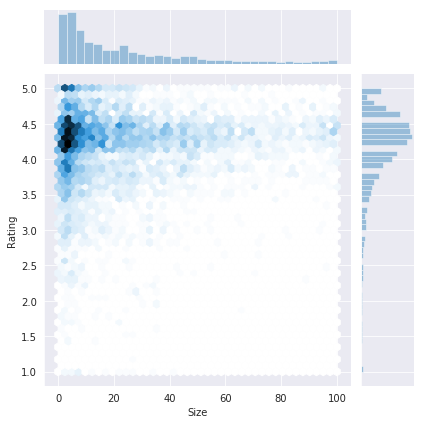

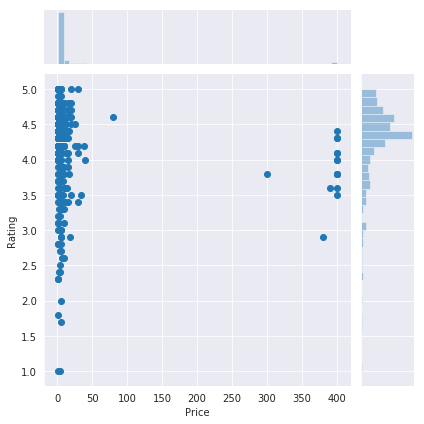

In [14]:
%matplotlib inline
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#plt.style.use("dark_background")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [34]:
large_categories.mean()

index       6.146361e+03
Rating      4.168344e+00
Reviews     2.189111e+05
Size        2.147108e+01
Installs    7.557866e+06
Price       1.379792e+00
dtype: float64

In [35]:
large_categories.count()

index             7360
App               7360
Category          7360
Rating            6220
Reviews           7360
Size              6531
Installs          7360
Type              7359
Price             7360
Content Rating    7360
Genres            7360
Last Updated      7360
Current Ver       7355
Android Ver       7358
dtype: int64

In [15]:
############################################

In [16]:
apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000,Free,0.00,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000,Free,0.00,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000,Free,0.00,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.000,5000000,Free,0.00,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000,Free,0.00,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,NaN,50000000,Free,0.00,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.00,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35.000,100000000,Free,0.00,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
195,USPS MOBILE®,BUSINESS,3.9,16589,9.100,1000000,Free,0.00,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up
196,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25.000,1000000,Free,0.00,Everyone,Business,"July 19, 2018",5.2.8,5.0 and up


In [17]:
apps[apps['Category'].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000,Free,0.00,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000,Free,0.00,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000,Free,0.00,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.000,5000000,Free,0.00,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000,Free,0.00,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,NaN,50000000,Free,0.00,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.00,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35.000,100000000,Free,0.00,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
195,USPS MOBILE®,BUSINESS,3.9,16589,9.100,1000000,Free,0.00,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up
196,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25.000,1000000,Free,0.00,Everyone,Business,"July 19, 2018",5.2.8,5.0 and up


## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Plot a strip plot with the x-axis  extending along the `Price` range and y-axies depicting the `Category`
    - [ ] Popular app list are "GAME", "FAMILY", "PHOTOGRAPHY",  "MEDICAL", "TOOLS", "FINANCE", "LIFESTYLE", "BUSINESS"
    - [ ] Get the list of Top 6 most popular categories automatically *(not part of DC exercise)*
- [ ] Print the `Category`, `App` and `Price` for apps that are priced above 200

***


,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


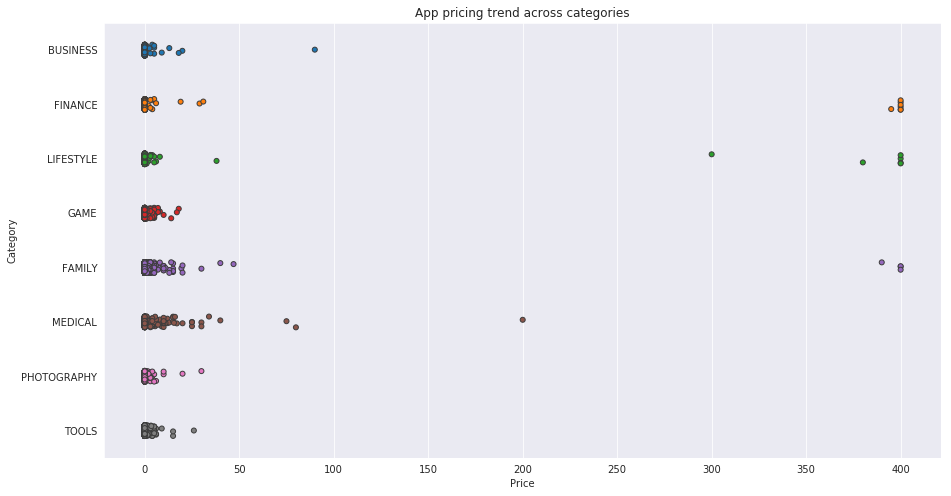

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

In [19]:
############################################

In [20]:
apps[apps['Price'] < 100].sort_values('Price', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9730,Lean EQ,BUSINESS,NaN,6,10.0,10,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2390,Language Therapy: Aphasia,MEDICAL,NaN,10,28.0,1000,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
6559,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.5,10,Paid,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up
4134,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.0,5,Paid,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up


## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] From the Popular Categories, select apps which are priced below $100 and assign it to `apps_under_100`
- [ ] Re-plot the strip plot using `apps_under_100` data

***


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

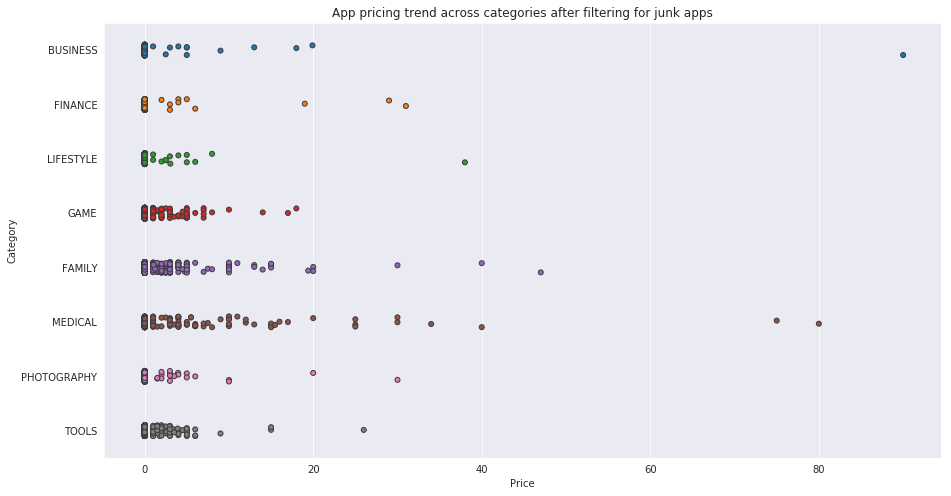

In [21]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Price'], y=apps_under_100['Category'], 
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Create an interactive box plot to compare `Paid` vs `Free` downloads

***


In [22]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
pyo.offline.iplot({'data': data, 'layout': layout})

In [23]:
##################################################

In [24]:
reviews_df = pd.read_csv('datasets/user_reviews.csv')

In [25]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [26]:
apps['App'].head()

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

In [27]:
reviews_df['App'].sample(5)

48558    Foursquare Swarm: Check In
46592                  Fitbit Coach
5565             All Events in City
54512       Golf GPS by SwingxSwing
33122      Daniel Tiger for Parents
Name: App, dtype: object

In [28]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

<div class="alert alert-block alert-info">
<b>To do:</b>  
</div>

- [ ] Create a static box plot between `Paid` and `Free` for a "Sentiment Polarity Distribution"
    - [ ] Read `datasets/user_reviews.csv` into a dataframe
    - [ ] Merge dataframe with `App` dataframe
    - [ ] Create a box plot with `Type` on the x-axis and `Sentiment Polarity` on the y-axis
    
***


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

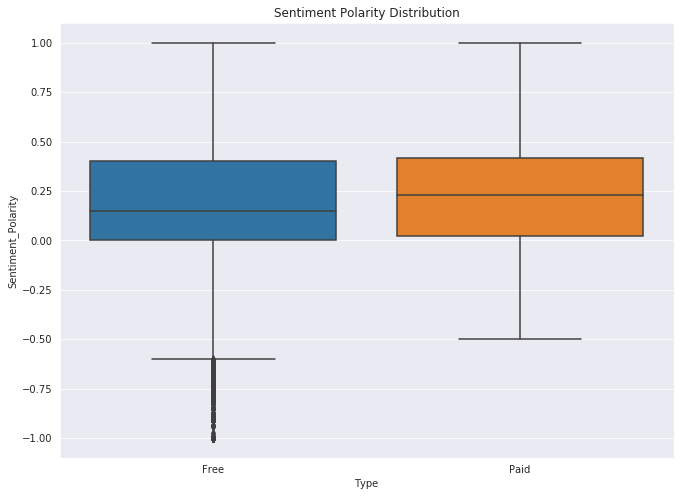

In [29]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
#merged_df = pd.merge(reviews_df['App'], apps['App'], on = 'App', how = "inner")
merged_df = pd.merge(apps, reviews_df, on = 'App', how="inner")


# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
merged_df.head()

#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')